# Distribución Exponencial

La **distribución exponencial** es una distribución continua que modela el tiempo entre eventos que ocurren de manera aleatoria pero a una **tasa constante**. Es muy utilizada en teoría de colas, confiabilidad de sistemas y procesos de Poisson.

## Función de Densidad de Probabilidad (PDF)

La función de densidad para la distribución exponencial está definida como:

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & \text{si } x \geq 0 \\
0 & \text{si } x < 0
\end{cases}
$$

donde:
- $ \lambda > 0 $ es la **tasa de eventos por unidad de tiempo**.
- $ x $ es el tiempo entre eventos.

## Propiedades

- **Media**: $ \mu = \frac{1}{\lambda} $
- **Varianza**: $ \sigma^2 = \frac{1}{\lambda^2} $
- **Función de Distribución Acumulada (CDF)**:

  $$
  F(x; \lambda) = 1 - e^{-\lambda x}
  $$

## Ejemplo

Si $ \lambda = 2 $, entonces:
- La media es $ \mu = \frac{1}{2} = 0.5 $
- La varianza es $ \frac{1}{4} = 0.25 $

La distribución describe tiempos entre eventos que ocurren en promedio cada 0.5 unidades de tiempo.


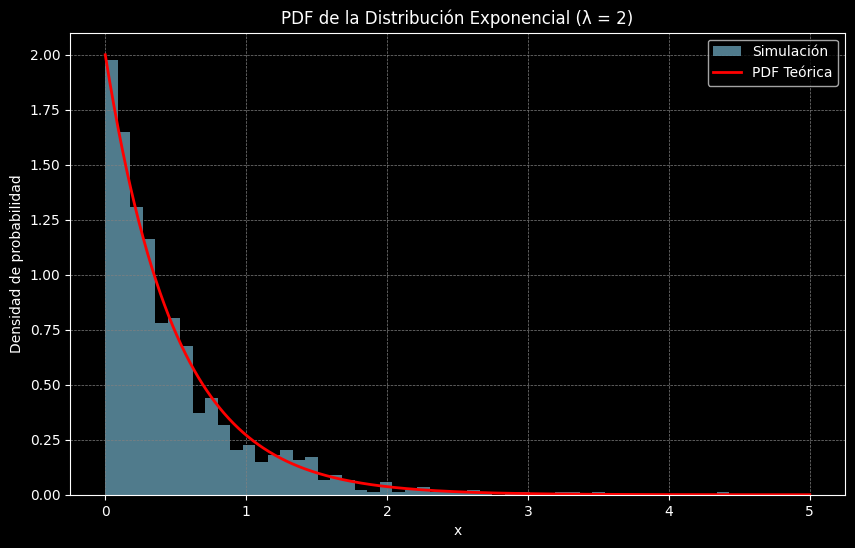

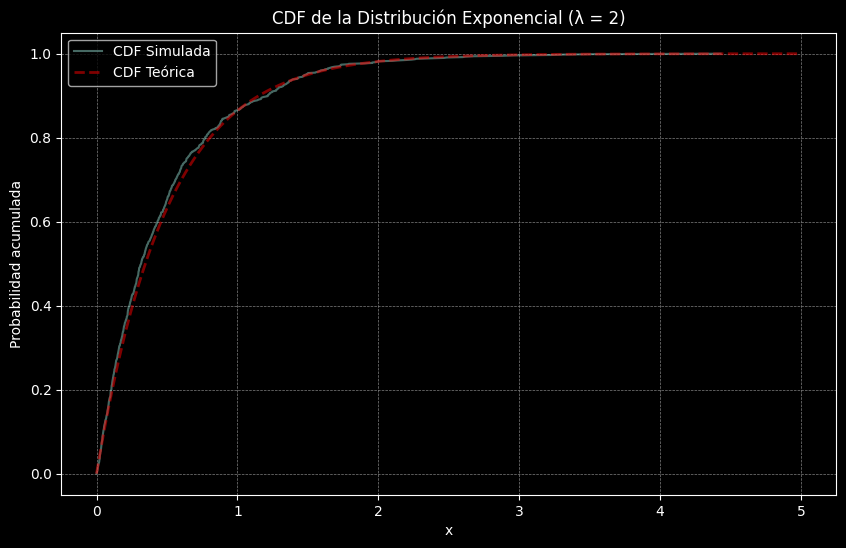

In [150]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Parámetro de la distribución
lambda_param = 2
n_samples = 1000

# Simular muestras
samples = np.random.exponential(scale=1 / lambda_param, size=n_samples)

# Valores para la curva teórica
x = np.linspace(0, 5, 1000)
pdf_theoretical = lambda_param * np.exp(-lambda_param * x)
cdf_theoretical = 1 - np.exp(-lambda_param * x)

# --------- GRÁFICO PDF ---------
plt.figure(figsize=(10, 6))

plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Simulación')
plt.plot(x, pdf_theoretical, 'r-', lw=2, label='PDF Teórica')

plt.title('PDF de la Distribución Exponencial (λ = 2)')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# --------- GRÁFICO CDF ---------
plt.figure(figsize=(10, 6))

# CDF simulada
sorted_samples = np.sort(samples)
empirical_cdf = np.arange(1, n_samples + 1) / n_samples
plt.plot(sorted_samples, empirical_cdf, label='CDF Simulada', alpha=0.5)

# CDF teórica
plt.plot(x, cdf_theoretical, '--r', lw=2, label='CDF Teórica', alpha=0.5)

plt.title('CDF de la Distribución Exponencial (λ = 2)')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


# Distribución Exponencial — Explicación Intuitiva

La **distribución exponencial** es una distribución de probabilidad continua que modela el **tiempo hasta que ocurre un evento**. Es muy útil cuando los eventos ocurren **al azar**, pero con una **tasa constante** en el tiempo.

## ¿Qué responde esta distribución?

Responde a preguntas como:

> **¿Cuánto tiempo debo esperar hasta que ocurra algo?**

## Ejemplos comunes:

### 1. 📞 Teléfono en una oficina
Si el teléfono suena en promedio 2 veces por minuto ($\lambda = 2$), la distribución exponencial te dice:

> ¿Cuánto tiempo pasará entre una llamada y la siguiente?

### 2. 🚗 Llegada de autos a una estación de servicio
Si llega un auto cada 10 minutos en promedio ($\lambda = \frac{1}{10}$):

> ¿Cuánto tiempo tendré que esperar para que llegue el próximo auto?

---

## Relación con procesos de Poisson

La distribución exponencial describe el **tiempo entre eventos consecutivos** en un **proceso de Poisson**, donde los eventos:
- Ocurren **al azar**.
- Tienen una **tasa constante** $\lambda$ (eventos por unidad de tiempo).

---

## Funciones importantes

### Función de densidad de probabilidad (PDF):

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & \text{si } x \geq 0 \\
0 & \text{si } x < 0
\end{cases}
$$

### Función de distribución acumulada (CDF):

$$
F(x; \lambda) = 1 - e^{-\lambda x}
$$

---

## Parámetros y propiedades

- $ \lambda > 0 $: tasa de ocurrencia de eventos (por unidad de tiempo)
- Media: $ \mu = \frac{1}{\lambda} $
- Varianza: $ \sigma^2 = \frac{1}{\lambda^2} $

---

## Ejemplo interpretado

Si $ \lambda = 2 $, entonces:
- El evento ocurre, en promedio, **cada 0.5 unidades de tiempo**.
- La probabilidad de que ocurra antes de $x = 1$ es:

$$
F(1; 2) = 1 - e^{-2 \cdot 1} \approx 0.8647
$$

Es decir, hay **un 86.47% de probabilidad de que el evento haya ocurrido antes de 1 unidad de tiempo**.

---

## Importante

- La PDF **puede tener valores mayores que 1**, especialmente cerca de $x = 0$, pero eso no es problema: lo que importa es que **el área total bajo la curva sea 1**.
- La distribución **no predice cuándo ocurrirá un evento exacto**, sino que **modela probabilísticamente el tiempo de espera**.


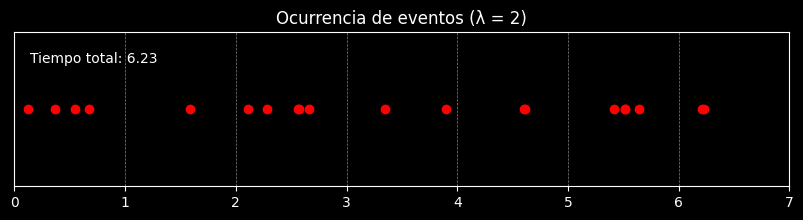

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parámetro λ
lambda_param = 2
n_events = 20

# Simulación de tiempos entre eventos y acumulados
inter_event_times = np.random.exponential(scale=1 / lambda_param, size=n_events)
event_times = np.cumsum(inter_event_times)

# Configurar gráfico
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlim(0, np.ceil(event_times[-1]))
ax.set_xticks(np.arange(0, np.ceil(event_times[-1]) + 1, 1))
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_title(f'Ocurrencia de eventos (λ = {lambda_param})')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

event_line, = ax.plot([], [], 'ro', label='Evento')
time_text = ax.text(0.02, 0.8, '', transform=ax.transAxes)

def init():
    event_line.set_data([], [])
    time_text.set_text('')
    return event_line, time_text

def update(frame):
    x = event_times[:frame + 1]
    y = np.ones_like(x) * 0.5
    event_line.set_data(x, y)
    time_text.set_text(f'Tiempo total: {event_times[frame]:.2f}')
    return event_line, time_text

ani = FuncAnimation(fig, update, frames=n_events, init_func=init,
                    blit=True, interval=600, repeat=False)

# Mostrar en Jupyter como HTML5 video
HTML(ani.to_jshtml())


### Un ejemplo: un evento ocurre con una tasa de 0.2 por minuto, se observan 1000 eventos

media:  0.9999999999999999
desv. std:  1.0035268298364604
min:  0.0003261410190576702
max:  6.2652528464460655


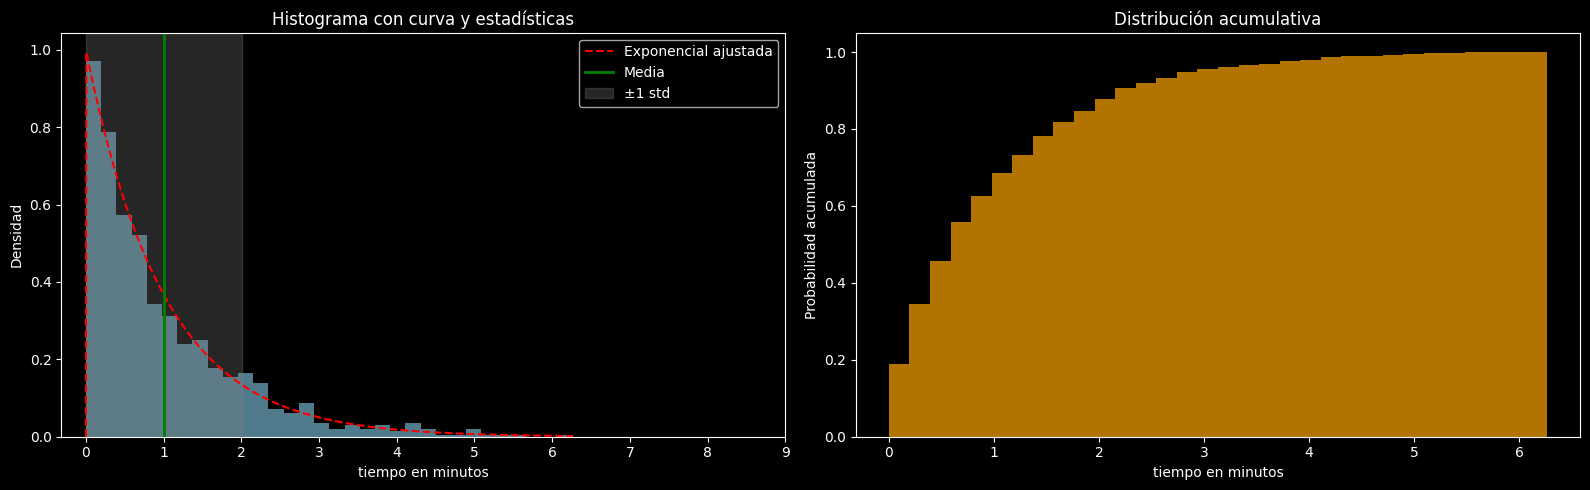

In [ ]:
# Generar 1000 números aleatorios siguiendo una distribución exponencial con lambda=0.2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Generar datos
lamb = 0.2
random_numbers = np.random.exponential(1/lamb, 1000)

# Ajustar para que la suma sea 1000
adjustment_factor = 1000 / np.sum(random_numbers)
adjusted_numbers = random_numbers * adjustment_factor

# Estadísticas
media = np.mean(adjusted_numbers)
std = np.std(adjusted_numbers)
min_val = np.min(adjusted_numbers)
max_val = np.max(adjusted_numbers)

print("media: ", media)
print("desv. std: ", std)
print("min: ", min_val)
print("max: ", max_val)

# Gráfica
plt.figure(figsize=(16, 5))

# --------- Subplot 1: Histograma con curva y stats ---------
plt.subplot(1, 2, 1)
plt.hist(adjusted_numbers, bins=32, density=True, alpha=0.6, color='skyblue')

# Curva de densidad de la exponencial ajustada
x = np.linspace(0, np.max(adjusted_numbers), 1000)
loc, scale = expon.fit(adjusted_numbers)
pdf = expon.pdf(x, loc, scale)
plt.plot(x, pdf, 'r--', label='Exponencial ajustada')

# Línea de la media
plt.axvline(media, color='green', linestyle='-', linewidth=2, label='Media')

# Banda de ±1 std
plt.axvspan(media - std, media + std, color='gray', alpha=0.3, label='±1 std')

plt.xlabel("tiempo en minutos")
plt.ylabel("Densidad")
plt.title("Histograma con curva y estadísticas")
plt.xticks(np.arange(0, 10, 1))
plt.legend()

# --------- Subplot 2: Histograma acumulativo ---------
plt.subplot(1, 2, 2)
plt.hist(adjusted_numbers, bins=32, cumulative=True, density=True, color='orange', alpha=0.7)
plt.xlabel("tiempo en minutos")
plt.ylabel("Probabilidad acumulada")
plt.title("Distribución acumulativa")

plt.tight_layout()
plt.show()


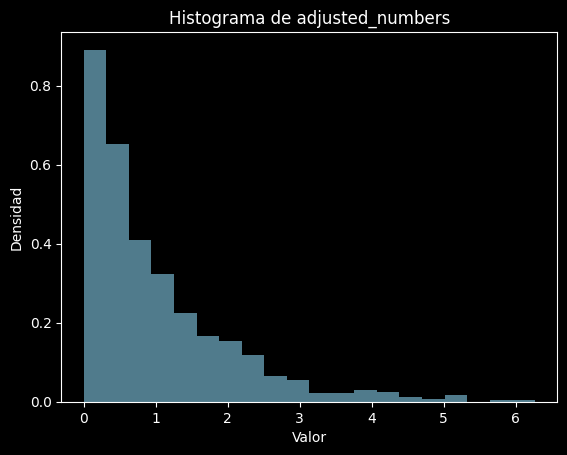

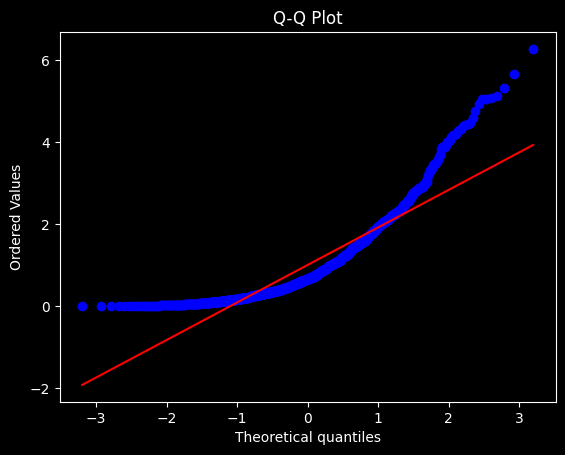

In [153]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histograma
plt.hist(adjusted_numbers, bins=20, density=True, alpha=0.6, color='skyblue')
plt.title("Histograma de adjusted_numbers")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.show()

# Q-Q plot contra distribución normal
stats.probplot(adjusted_numbers, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [154]:
from scipy.stats import shapiro

stat, p = shapiro(adjusted_numbers)
print(f"Shapiro-Wilk: estadístico = {stat:.4f}, p = {p:.4f}")

if p > 0.05:
    print("✔️ Parece que los datos siguen una distribución normal.")
else:
    print("❌ Los datos no siguen una distribución normal.")


Shapiro-Wilk: estadístico = 0.8261, p = 0.0000
❌ Los datos no siguen una distribución normal.


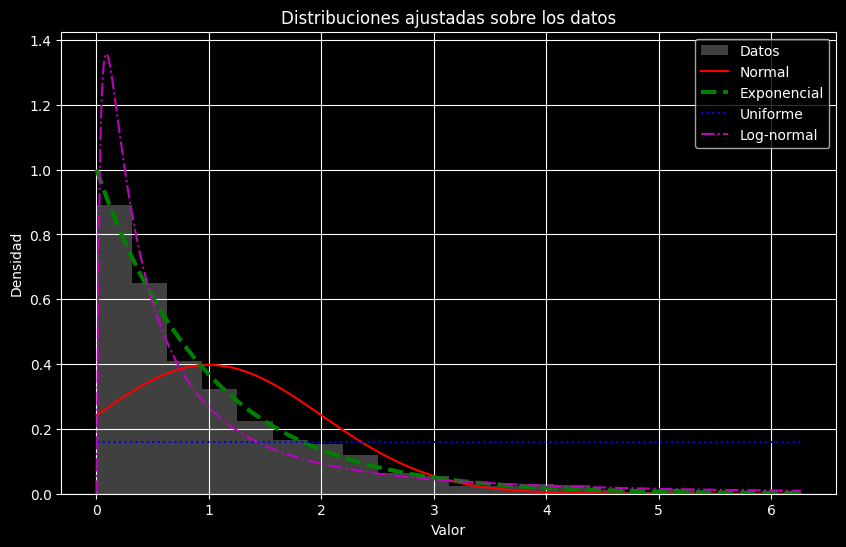

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform, lognorm

# Suponemos que adjusted_numbers ya está definido
plt.figure(figsize=(10,6))

# Histograma de los datos
plt.hist(adjusted_numbers, bins=20, density=True, alpha=0.5, color='gray', label='Datos')

# Espacio de valores x para dibujar las distribuciones
x = np.linspace(min(adjusted_numbers), max(adjusted_numbers), 1000)

# 1. Normal
mu, std = norm.fit(adjusted_numbers)
pdf_norm = norm.pdf(x, mu, std)
plt.plot(x, pdf_norm, 'r-', label='Normal')

# 2. Exponencial
loc_exp, scale_exp = expon.fit(adjusted_numbers)
pdf_exp = expon.pdf(x, loc_exp, scale_exp)
plt.plot(x, pdf_exp, 'g--', label='Exponencial', linewidth=3, alpha=1)

# 3. Uniforme
loc_uni, scale_uni = uniform.fit(adjusted_numbers)
pdf_uni = uniform.pdf(x, loc_uni, scale_uni)
plt.plot(x, pdf_uni, 'b:', label='Uniforme')

# 4. Log-normal
shape_ln, loc_ln, scale_ln = lognorm.fit(adjusted_numbers, floc=0)  # floc=0 fuerza loc=0 para mayor estabilidad
pdf_ln = lognorm.pdf(x, shape_ln, loc_ln, scale_ln)
plt.plot(x, pdf_ln, 'm-.', label='Log-normal')

# Personalización
plt.title("Distribuciones ajustadas sobre los datos")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()



In [156]:
from scipy.stats import norm, expon, uniform, lognorm, kstest
import pandas as pd

results = []

# Normal
mu, std = norm.fit(adjusted_numbers)
ks_norm, p_norm = kstest(adjusted_numbers, 'norm', args=(mu, std))
results.append({
    "Distribución": "Normal",
    "Parámetros": f"mu={mu:.2f}, std={std:.2f}",
    "KS": f"{ks_norm:.3f}",
    "p-valor": f"{p_norm:.3f}"
})

# Exponencial
loc_exp, scale_exp = expon.fit(adjusted_numbers)
ks_exp, p_exp = kstest(adjusted_numbers, 'expon', args=(loc_exp, scale_exp))
results.append({
    "Distribución": "Exponencial",
    "Parámetros": f"loc={loc_exp:.2f}, scale={scale_exp:.2f}",
    "KS": f"{ks_exp:.3f}",
    "p-valor": f"{p_exp:.3f}"
})

# Uniforme
loc_uni, scale_uni = uniform.fit(adjusted_numbers)
ks_uni, p_uni = kstest(adjusted_numbers, 'uniform', args=(loc_uni, scale_uni))
results.append({
    "Distribución": "Uniforme",
    "Parámetros": f"loc={loc_uni:.2f}, scale={scale_uni:.2f}",
    "KS": f"{ks_uni:.3f}",
    "p-valor": f"{p_uni:.3f}"
})

# Log-normal
shape_ln, loc_ln, scale_ln = lognorm.fit(adjusted_numbers, floc=0)
ks_ln, p_ln = kstest(adjusted_numbers, 'lognorm', args=(shape_ln, loc_ln, scale_ln))
results.append({
    "Distribución": "Log-normal",
    "Parámetros": f"shape={shape_ln:.2f}, loc={loc_ln:.2f}, scale={scale_ln:.2f}",
    "KS": f"{ks_ln:.3f}",
    "p-valor": f"{p_ln:.3f}"
})

# Crear tabla ordenada por KS
df_resultados = pd.DataFrame(results).sort_values(by="KS")
print(df_resultados.to_string(index=False))


Distribución                       Parámetros    KS p-valor
 Exponencial             loc=0.00, scale=1.00 0.025   0.528
  Log-normal shape=1.35, loc=0.00, scale=0.54 0.070   0.000
      Normal                mu=1.00, std=1.00 0.160   0.000
    Uniforme             loc=0.00, scale=6.26 0.538   0.000
